In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ads_data = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/lesson_5_ads_data.csv.zip', compression='zip')

In [ ]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [ ]:
ads_data.dtypes

ad_id                      int64
time                       int64
event                     object
date                      object
ad_cost_type              object
has_video                  int64
client_union_id            int64
campaign_union_id          int64
platform                  object
ad_cost                  float64
target_audience_count      int64
user_id                    int64
dtype: object

In [ ]:
ads_data['date'] = pd.to_datetime(ads_data['date'], format='%Y-%m-%d')

In [ ]:
ads_data['full_date'] = pd.to_datetime(ads_data['time'], unit='s')

In [ ]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [ ]:
ads_data.shape

(3176714, 13)

## Получить статистику по дням. Посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

<Axes: xlabel='date'>

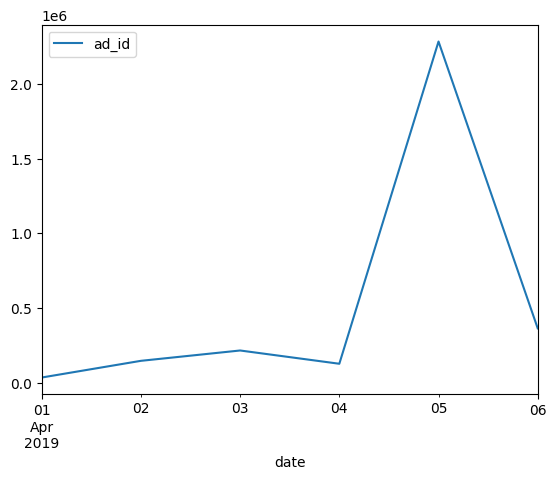

In [ ]:
ads_data.groupby('date') \
.agg({'ad_id': 'count'}).plot()

In [ ]:
ads_data.groupby(['date', 'event'], as_index=False).agg({'ad_id': 'count'})\
.pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [ ]:
# ?? pd.pivot

In [ ]:
ads_data[ads_data['date'] == '2019-04-05'].groupby('ad_id').agg({'time': 'count'}).sort_values('time', ascending=False).head()


,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [ ]:
ad_id_max = 112583

In [ ]:
ads_data.query('ad_id == @ad_id_max').groupby('date').agg({'time': 'count'})

,time
date,
2019-04-05,2166611
2019-04-06,348613


In [ ]:
ads_data.query('ad_id == @ad_id_max').head(1)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


## Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех кликов объявлений к просмотрам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

In [ ]:
ads_pivot = ads_data.groupby(['ad_id', 'event'], as_index=False).agg({'time': 'count'})\
.pivot(index='ad_id', columns='event', values='time').reset_index()

In [ ]:
ads_pivot = ads_pivot.assign(ctr = ads_pivot['click'] / ads_pivot['view'],
                             ctr_per = 100 * ads_pivot['click'] / ads_pivot['view'])

In [ ]:
ads_pivot.sort_values('ctr', ascending=False).head()

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302


In [ ]:
ads_pivot['ctr'].mean()

0.020628096080757954

In [ ]:
ads_pivot['ctr'].median()

0.010753240746688594

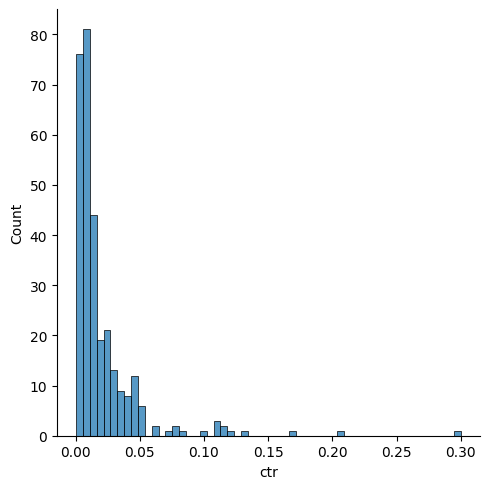

In [ ]:
sns.displot(ads_pivot['ctr'])

## Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [ ]:
ads_pivot = ads_pivot.fillna(0)

In [ ]:
ads_ids_bug = ads_pivot[ads_pivot['click'] == 0]['ad_id']

In [ ]:
ads_data[ads_data['ad_id'].isin(ads_ids_bug)]\
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id', ascending=False)

,platform,ad_id
0,android,4906
1,ios,3075
2,web,1988


In [ ]:
ads_data\
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id', ascending=False)

,platform,ad_id
0,android,1588211
1,ios,953078
2,web,635425


## Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [ ]:
df_2019_04_04 = ads_data[ads_data['date'] == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False).agg({'time': 'count'})\
.pivot(index='ad_id', columns='event', values='time').reset_index().fillna(0)

In [ ]:
df_2019_04_04

event,ad_id,click,view
0,9071,3.0,352.0
1,9776,37.0,1115.0
2,10601,3.0,848.0
3,11887,151.0,8720.0
4,12137,1.0,170.0
...,...,...,...
145,120790,0.0,19.0
146,121779,68.0,1116.0
147,121790,7.0,701.0
148,121941,0.0,95.0


In [ ]:
df_2019_04_04['ctr'] = df_2019_04_04['click'] / df_2019_04_04['view']

In [ ]:
df_2019_04_04['ctr'].describe()

count    150.000000
mean       0.018615
std        0.030773
min        0.000000
25%        0.000000
50%        0.007879
75%        0.023658
max        0.209056
Name: ctr, dtype: float64

In [ ]:
df_2019_04_04[df_2019_04_04['click'] > 0]['ctr'].quantile(q=0.95)

0.10211538461538454

## Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена 200 рублей, то за один показ мы зарабатываем 200 / 1000.

In [ ]:
CPC = ads_data[(ads_data['ad_cost_type'] == 'CPC') & (ads_data['event'] == 'click')]

In [ ]:
CPM = ads_data[(ads_data['ad_cost_type'] == 'CPM') & (ads_data['event'] == 'view')]

In [ ]:
CPC['ad_cost'].sum()

84810.0

In [ ]:
CPM['ad_cost'].sum() / 1000

497090.6778000003

In [ ]:
CPC.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
248,4585,1554135960,click,2019-04-01,CPC,0,37,4382,android,53.5,327648,538,2019-04-01 16:26:00
880,120444,1554136218,click,2019-04-01,CPC,0,120413,120440,android,52.0,4667,874,2019-04-01 16:30:18
1011,38110,1554136457,click,2019-04-01,CPC,0,23359,38110,android,54.1,4181,239,2019-04-01 16:34:17
1569,38575,1554133580,click,2019-04-01,CPC,0,23533,38575,android,44.8,21831,1016,2019-04-01 15:46:20
1950,38575,1554134271,click,2019-04-01,CPC,0,23533,38575,ios,44.8,21831,980,2019-04-01 15:57:51


In [ ]:
CPM_per_date = CPM.groupby('date').agg({'ad_cost': 'sum'}).sort_values('ad_cost')['ad_cost'] / 1000

In [ ]:
CPC.groupby('date').agg({'ad_cost': 'sum'}).sort_values('ad_cost')['ad_cost'] + CPM_per_date

date
2019-04-01     13159.7123
2019-04-02     33837.0051
2019-04-03     73209.5170
2019-04-04     46294.3568
2019-04-05    358559.7490
2019-04-06     56840.3376
Freq: D, Name: ad_cost, dtype: float64

## Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

In [ ]:
ads_data[ads_data['event'] == 'view']['platform'].value_counts(normalize=True)

android    0.500218
ios        0.299745
web        0.200038
Name: platform, dtype: float64

## А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [ ]:
ads_data.groupby(['ad_id', 'event'], as_index=False).agg({'time': 'min'}).pivot(index='ad_id', columns='event', values='time').reset_index() \
.query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [ ]:
ads_data[ads_data['ad_id'] == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58
